In [ ]:
import random
import matplotlib.pyplot as plt


In [ ]:
def generate_er_random_graph(n, p):
    # Initialize an empty adjacency matrix
    graph = [[0 for _ in range(n)] for _ in range(n)]

    # Iterate over all pairs of nodes
    for i in range(n):
        for j in range(i + 1, n):  # ensure j > i to avoid loops and duplicate edges
            if random.random() < p:
                # Add an edge with probability p
                graph[i][j] = 1
                graph[j][i] = 1

    return graph

In [ ]:
import numpy as np
def plot_graph(graph):
    n = len(graph)
    plt.figure(figsize=(8, 8))
    plt.axis('off')

    # Generate node positions on a circle
    positions = {i: (np.cos(2 * np.pi * i / n), np.sin(2 * np.pi * i / n)) for i in range(n)}

    # Draw edges
    for i in range(n):
        for j in range(i + 1, n):
            if graph[i][j] == 1:
                plt.plot([positions[i][0], positions[j][0]], [positions[i][1], positions[j][1]], 'k-', lw=0.5)

    # Draw nodes
    for i in range(n):
        plt.plot(positions[i][0], positions[i][1], 'bo')

    plt.show()


In [ ]:
# Parameters
n = 50
p = 0.1

# Generate the graph
graph = generate_er_random_graph(n, p)

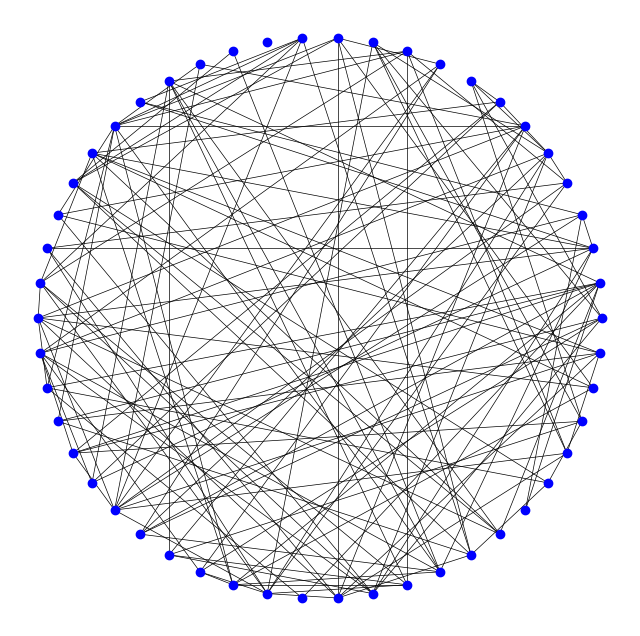

In [ ]:
# Plot the graph
plot_graph(graph)

In [ ]:
def plot_graph_grid(graph):
    n = len(graph)
    side = int(np.ceil(np.sqrt(n)))  # Determine the size of the grid
    plt.figure(figsize=(8, 8))
    plt.axis('off')

    # Generate node positions in a grid layout
    positions = {}
    for i in range(n):
        x = i % side
        y = i // side
        positions[i] = (x, y)

    # Draw edges
    for i in range(n):
        for j in range(i + 1, n):
            if graph[i][j] == 1:
                plt.plot([positions[i][0], positions[j][0]], [positions[i][1], positions[j][1]], 'k-', lw=0.5)

    # Draw nodes
    for i in range(n):
        plt.plot(positions[i][0], positions[i][1], 'bo', markersize=10)

    plt.show()

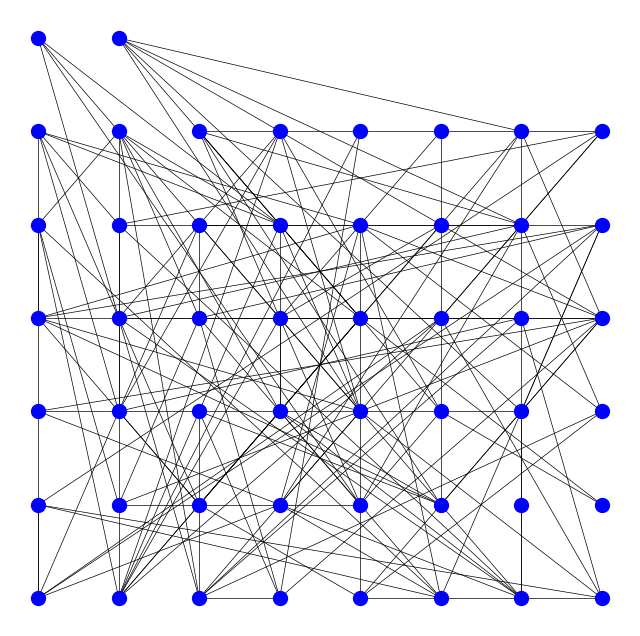

In [ ]:
plot_graph_grid(graph)

In [ ]:
def plot_graph_triangle(graph):
    n = len(graph)
    plt.figure(figsize=(8, 8))
    plt.axis('off')

    # Generate node positions in a triangular layout
    positions = {}
    current_node = 0
    for row in range(1, n):
        for i in range(row):
            if current_node < n:
                positions[current_node] = (i, -row)
                current_node += 1
        if current_node >= n:
            break

    # Draw edges
    for i in range(n):
        for j in range(i + 1, n):
            if graph[i][j] == 1:
                plt.plot([positions[i][0], positions[j][0]], [positions[i][1], positions[j][1]], 'k-', lw=0.5)

    # Draw nodes
    for i in range(n):
        plt.plot(positions[i][0], positions[i][1], 'bo', markersize=10)

    plt.show()

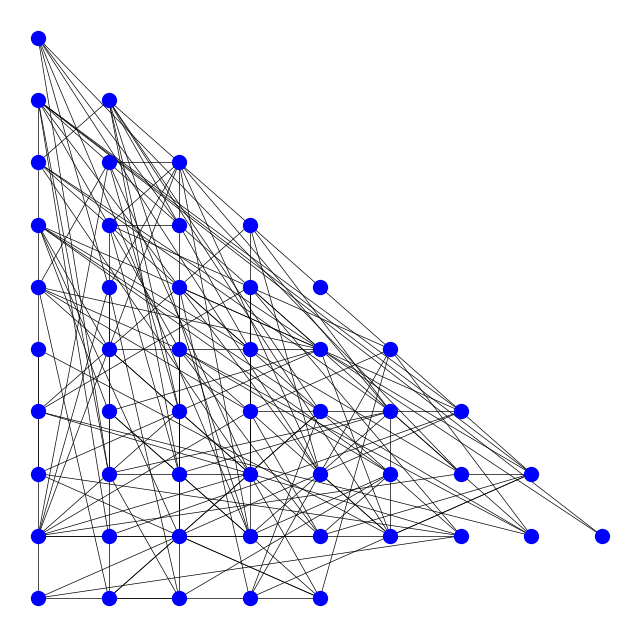

In [ ]:
plot_graph_triangle(graph)


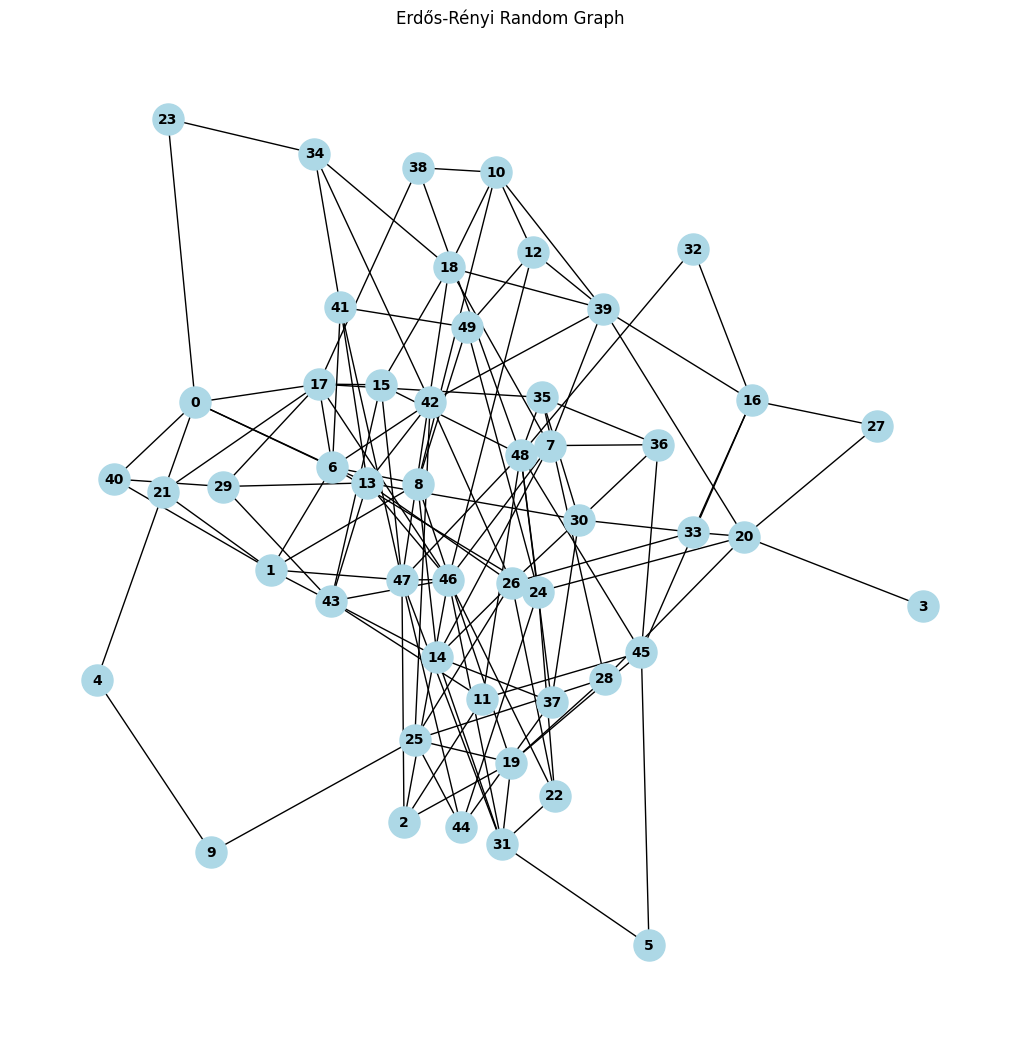

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(n=50, p=0.1):
    """
    Visualize the Erdős-Rényi random graph using matplotlib.

    Args:
    n (int): Number of nodes in the graph.
    p (float): Probability of edge creation between any pair of nodes.
    """

    # Generate an Erdős-Rényi random graph G(n, p)
    G = nx.erdos_renyi_graph(n, p)

    # Use the spring layout for positioning nodes
    pos = nx.spring_layout(G)

    # Plot the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color='lightblue',
            with_labels=True, node_size=500, font_size=10, font_weight='bold')
    plt.title("Erdős-Rényi Random Graph")
    plt.show()

# Call the function to visualize the graph
visualize_graph()

In [ ]:
import numpy as np


In [ ]:
def spring_layout(graph, iterations=100, k=0.1, c=0.01):
    """Calculate the positions of nodes using a simple spring layout algorithm."""
    n = len(graph)
    positions = {i: np.random.rand(2) * 10 - 5 for i in range(n)}
    velocities = {i: np.zeros(2) for i in range(n)}

    for _ in range(iterations):
        forces = {i: np.zeros(2) for i in range(n)}

        # Repulsive forces between all pairs of nodes
        for i in range(n):
            for j in range(i + 1, n):
                delta = positions[i] - positions[j]
                distance = np.linalg.norm(delta) + 0.01
                repulsive_force = (k**2 / distance) * (delta / distance)
                forces[i] += repulsive_force
                forces[j] -= repulsive_force

        # Attractive forces for edges
        for i in range(n):
            for j in range(i + 1, n):
                if graph[i][j] == 1:
                    delta = positions[i] - positions[j]
                    distance = np.linalg.norm(delta) + 0.01
                    attractive_force = -(distance**2 / k) * (delta / distance)
                    forces[i] += attractive_force
                    forces[j] -= attractive_force

        # Update positions and velocities with damping
        for i in range(n):
            velocities[i] = (velocities[i] + c * forces[i]) * 0.85
            positions[i] += velocities[i]

            # Ensure positions are finite
            if not np.all(np.isfinite(positions[i])):
                positions[i] = np.random.rand(2) * 10 - 5

    return positions

In [ ]:
def plot_graph(positions, graph):
    """Plot the graph using matplotlib based on calculated positions."""
    n = len(graph)
    plt.figure(figsize=(10, 10))
    plt.axis('off')

    # Draw edges
    for i in range(n):
        for j in range(i + 1, n):
            if graph[i][j] == 1:
                plt.plot([positions[i][0], positions[j][0]], [positions[i][1], positions[j][1]], 'k-', lw=0.5)

    # Draw nodes
    for i in range(n):
        plt.plot(positions[i][0], positions[i][1], 'bo', markersize=10)
        plt.text(positions[i][0], positions[i][1], str(i), fontsize=10, ha='center', va='center', fontweight='bold')

    plt.title("Erdős-Rényi Random Graph (Without NetworkX)")
    plt.show()

In [ ]:
# Parameters
n = 50
p = 0.1

In [ ]:
# Calculate the spring layout
positions = spring_layout(graph)


<ipython-input-14-da9e77e4387e>:25: RuntimeWarning: invalid value encountered in multiply
  attractive_force = -(distance**2 / k) * (delta / distance)


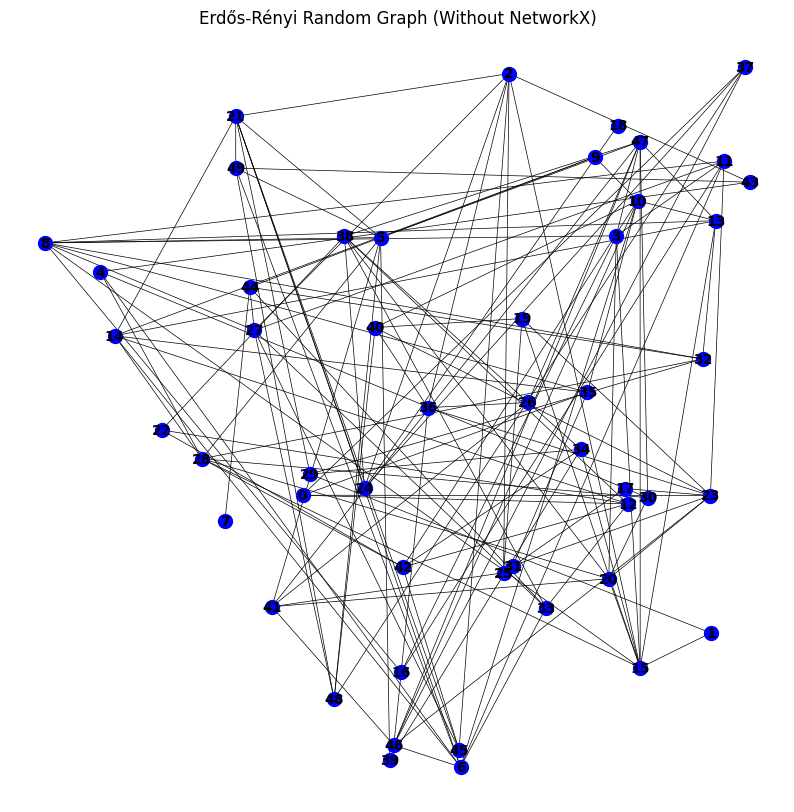

In [ ]:
# Plot the graph
plot_graph(positions, graph)

QUES NO (1) - PART 2

In [ ]:
def generate_er_random_graph(n, p):
    """Generate an Erdős-Rényi random graph represented as an adjacency matrix."""
    graph = [[0 for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                graph[i][j] = 1
                graph[j][i] = 1

    return graph

In [ ]:
def calculate_degree_distribution(graph):
    """Calculate the degree distribution of nodes in the graph."""
    degree_distribution = {}
    for i in range(len(graph)):
        degree = sum(graph[i])
        if degree in degree_distribution:
            degree_distribution[degree] += 1
        else:
            degree_distribution[degree] = 1
    return degree_distribution

In [ ]:
def plot_degree_distribution(degree_distribution, n, p):
    """Plot the degree distribution."""
    degrees = list(degree_distribution.keys())
    counts = list(degree_distribution.values())

    plt.figure(figsize=(8, 6))
    plt.bar(degrees, counts, color='lightblue')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.title(f'Degree Distribution (n={n}, p={p})')
    plt.show()

In [ ]:
# Parameters
node_counts = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

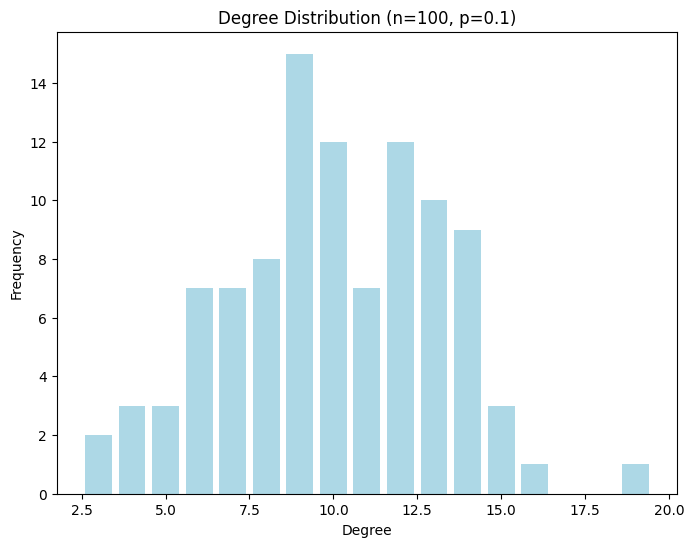

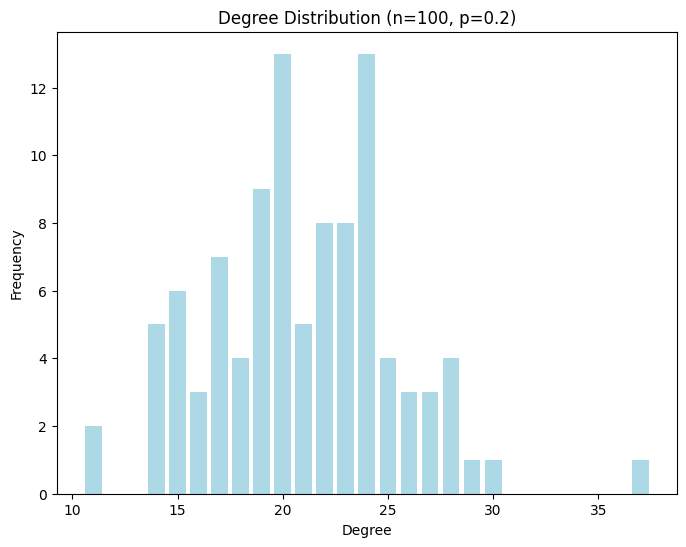

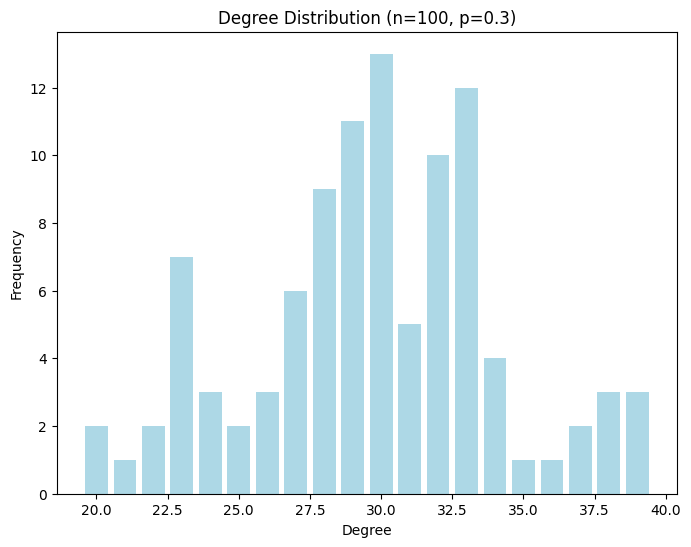

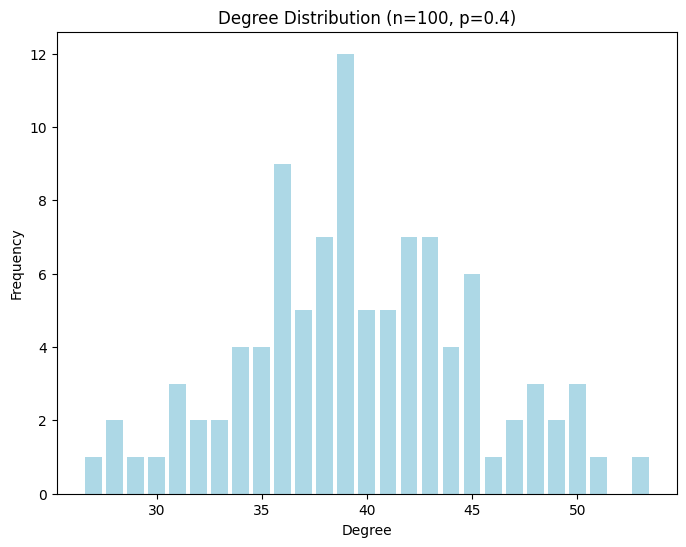

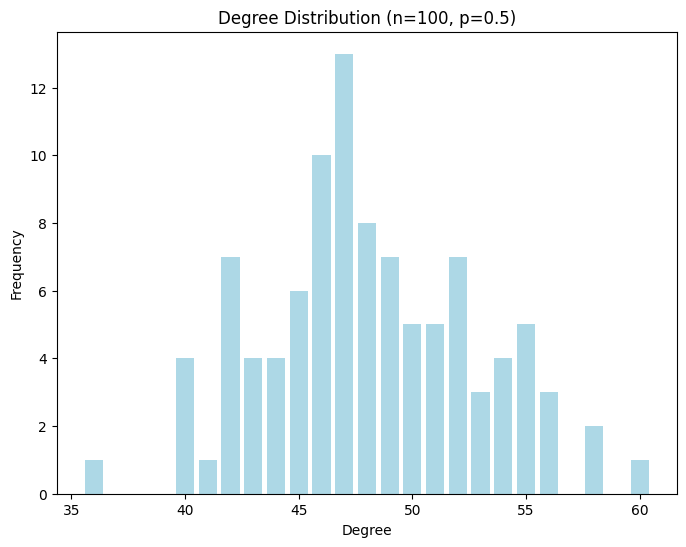

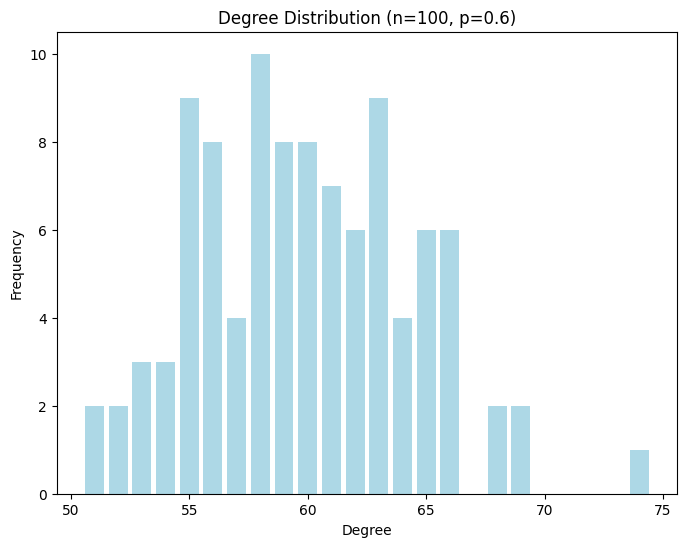

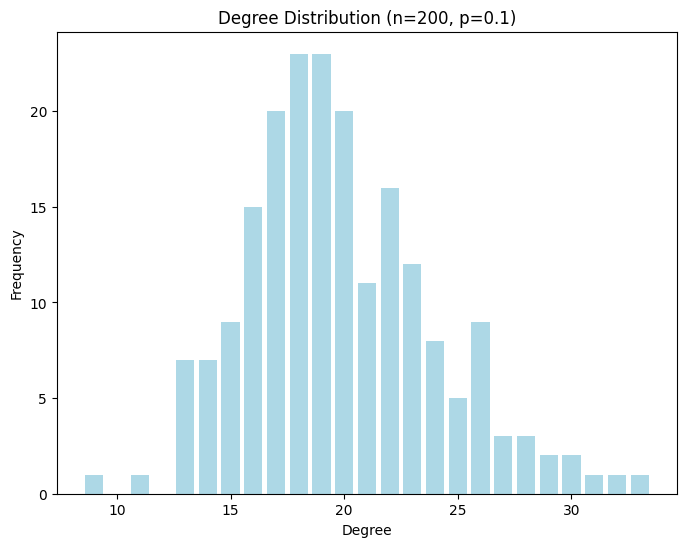

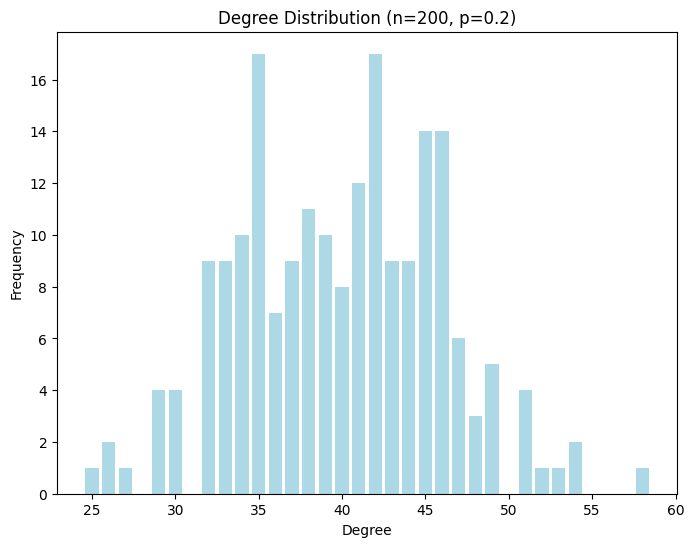

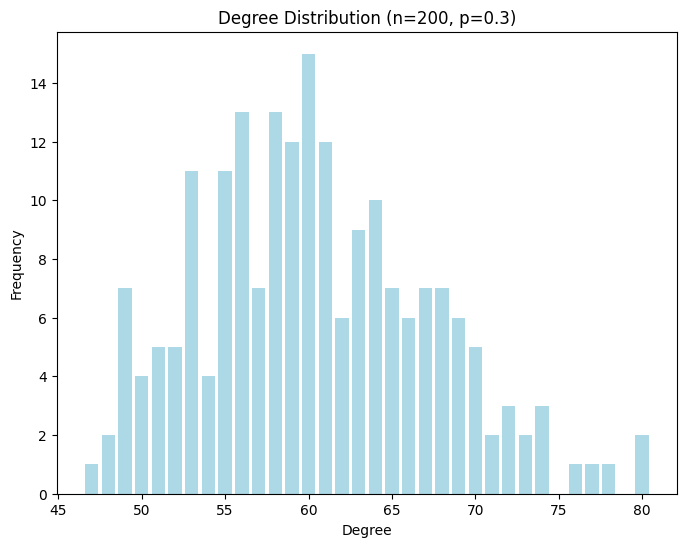

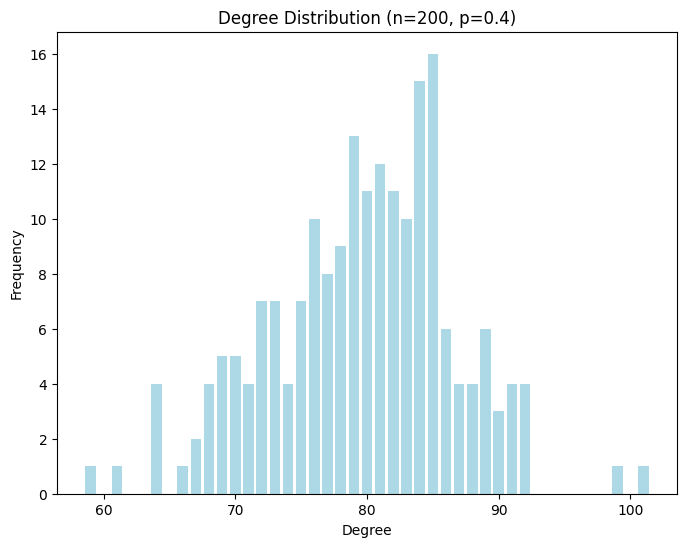

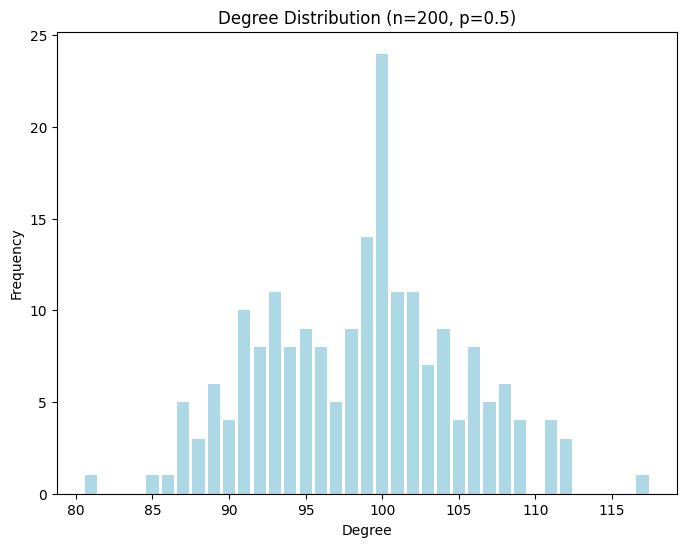

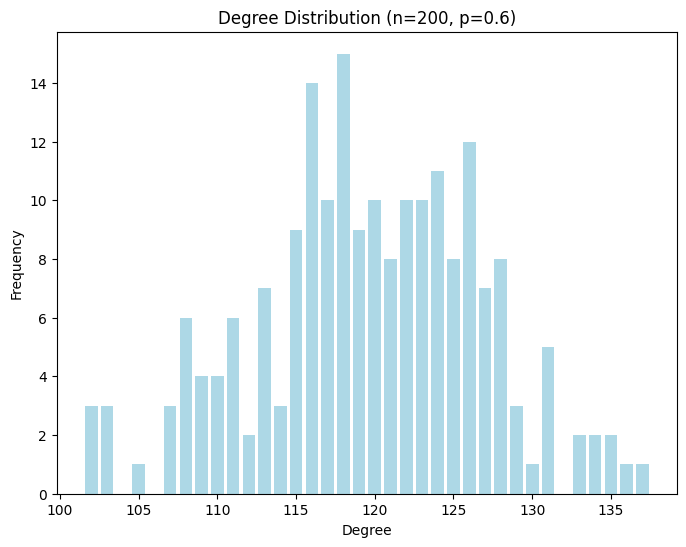

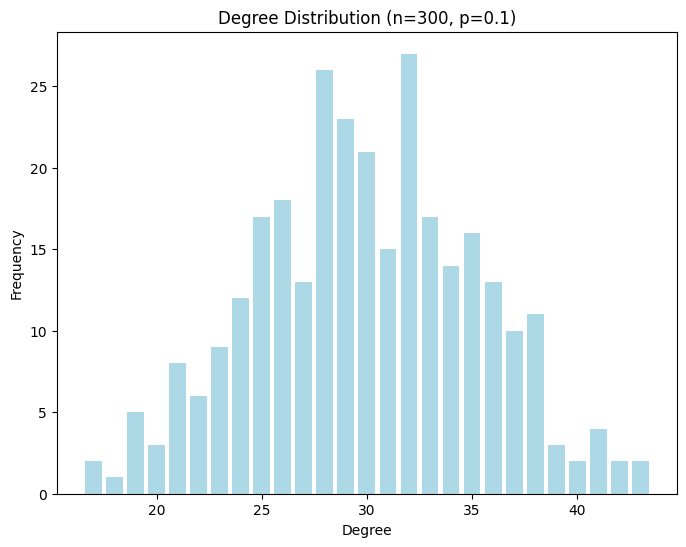

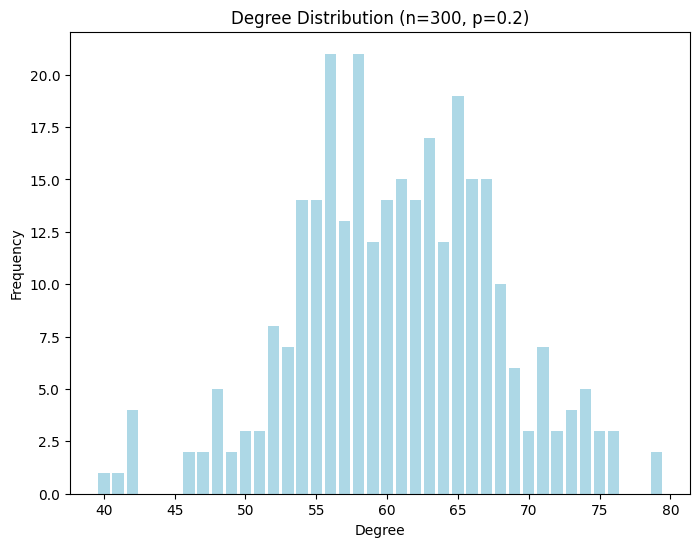

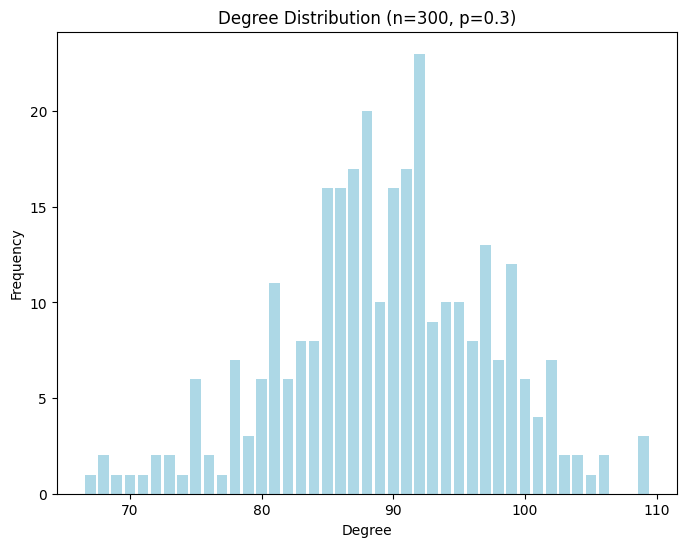

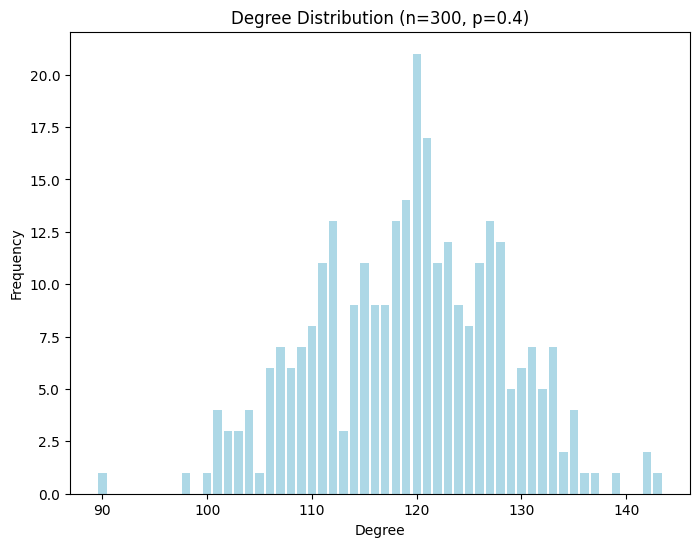

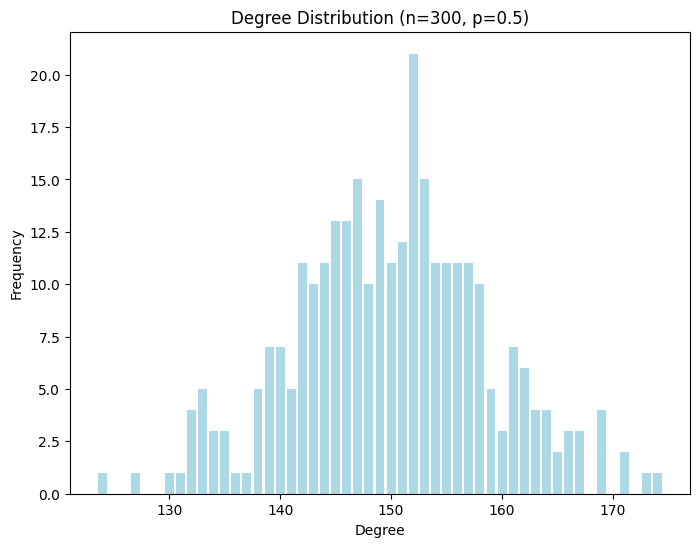

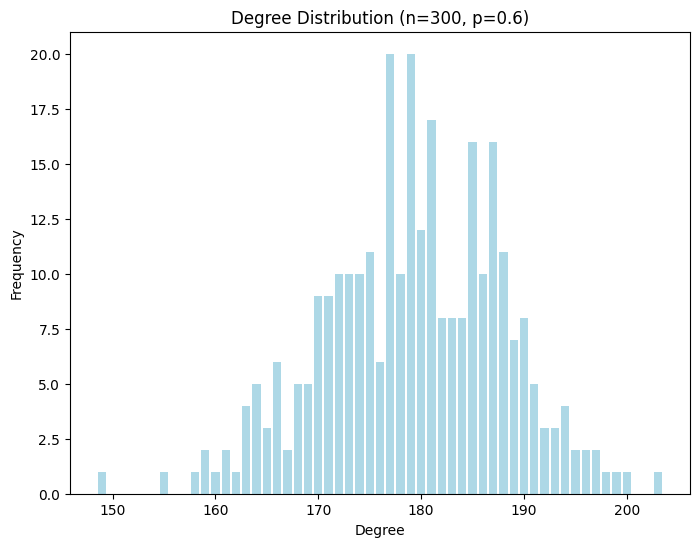

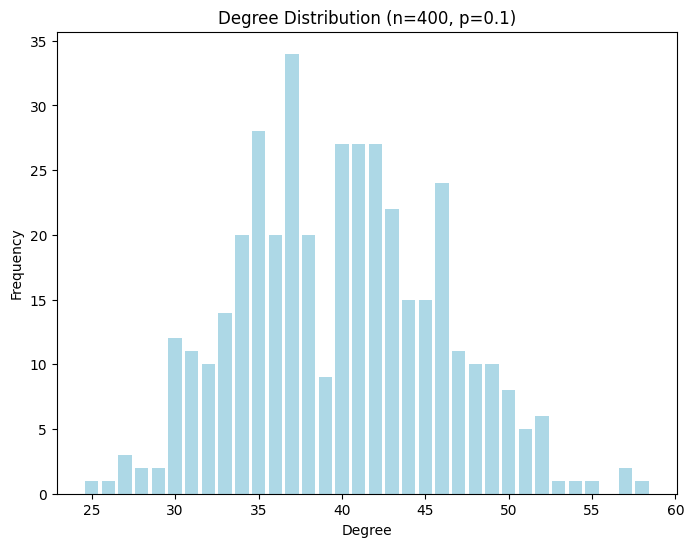

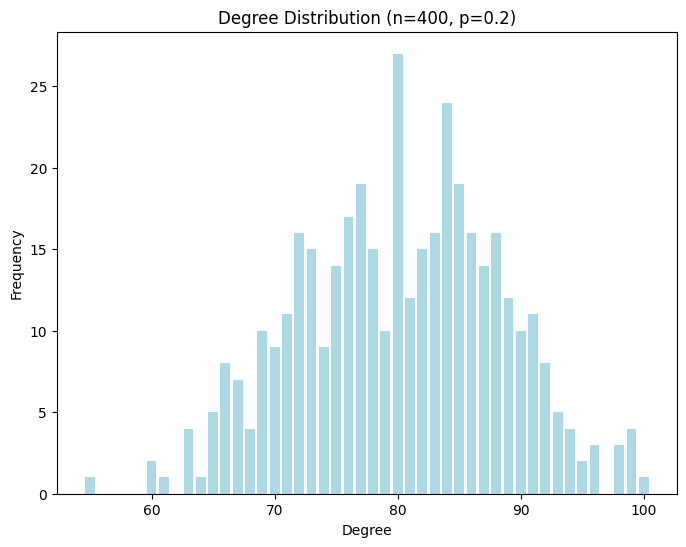

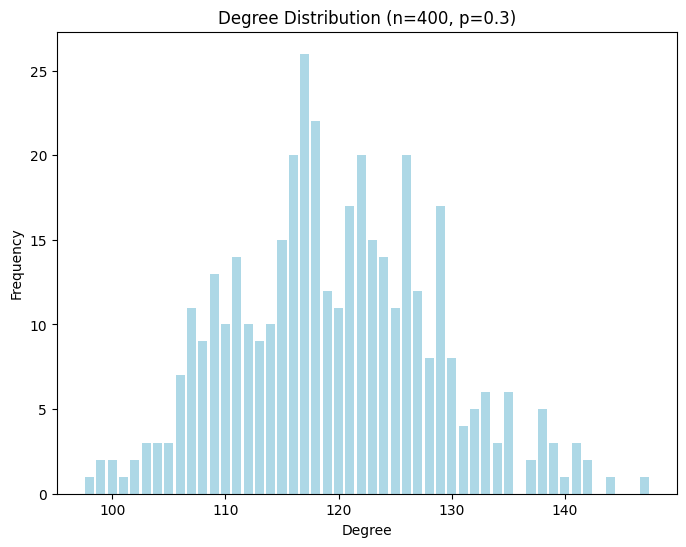

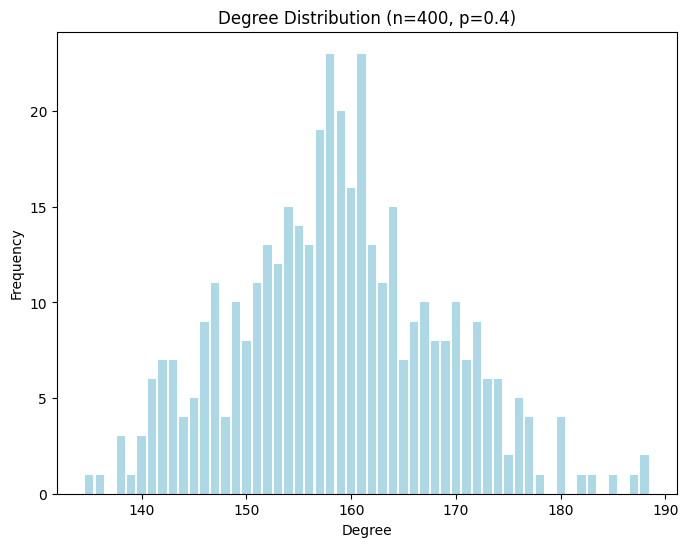

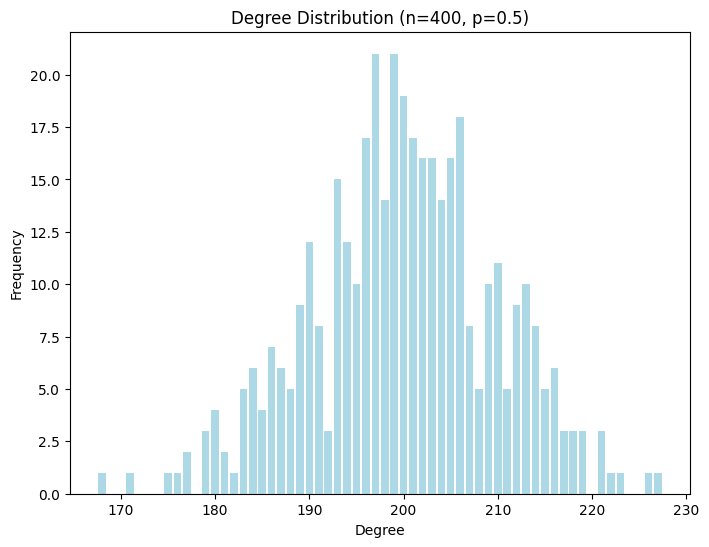

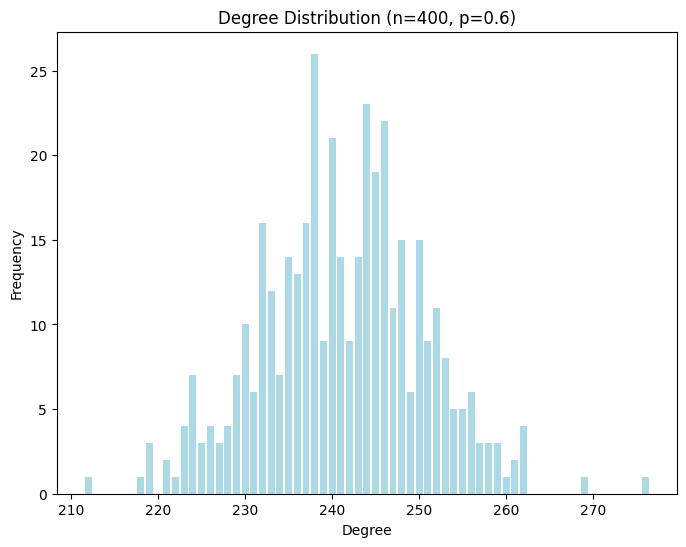

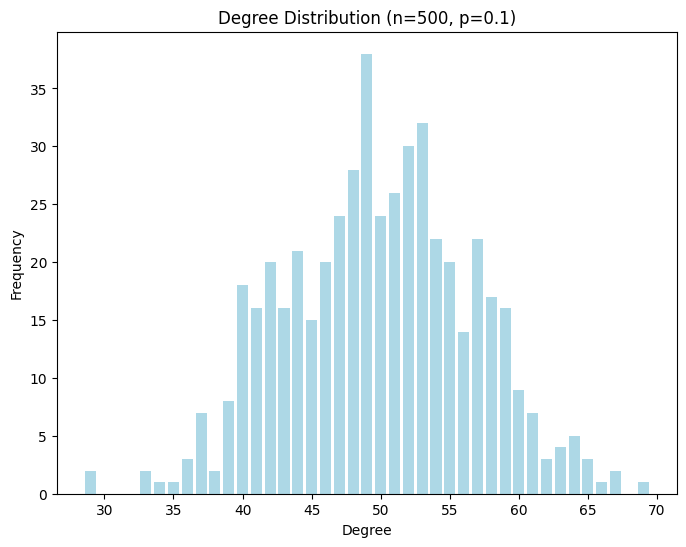

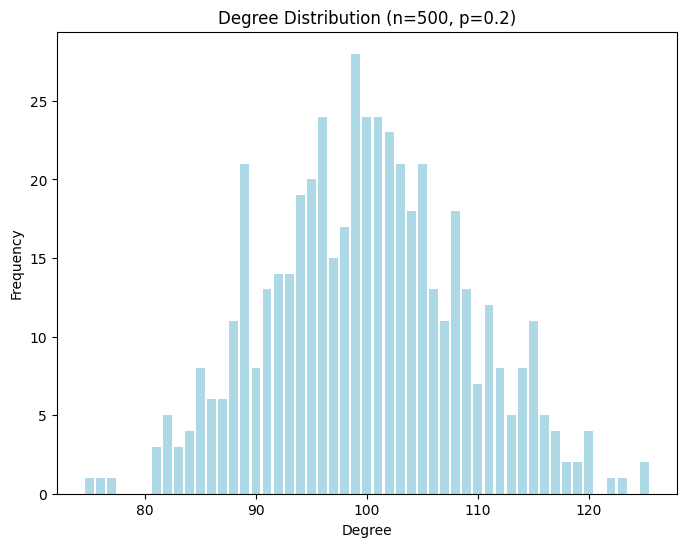

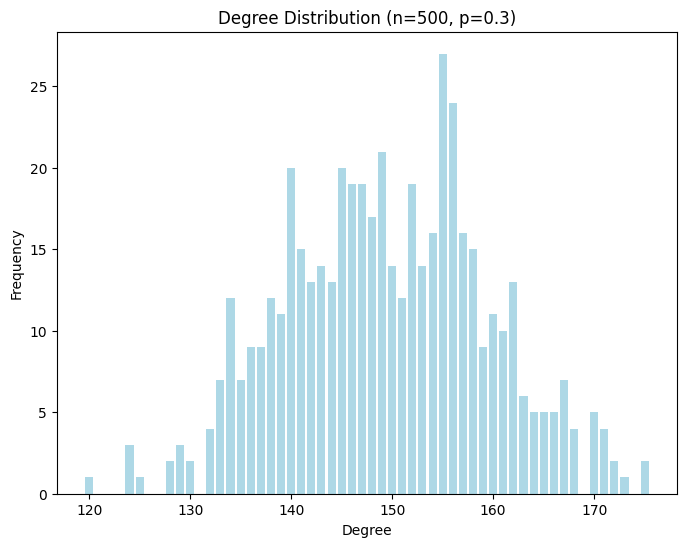

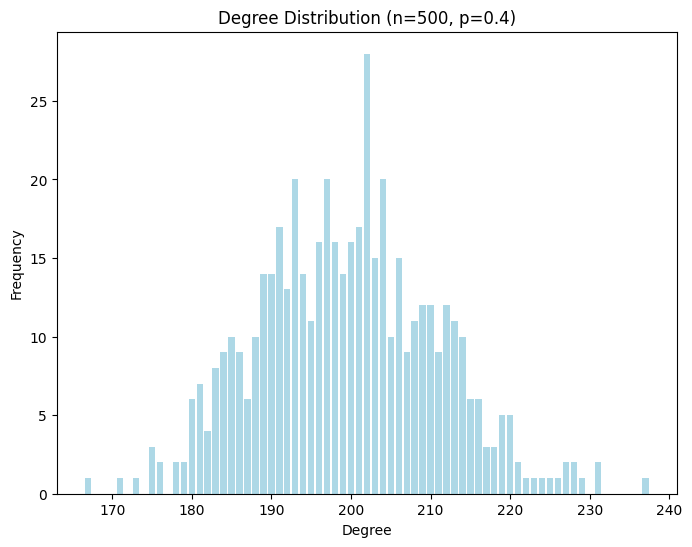

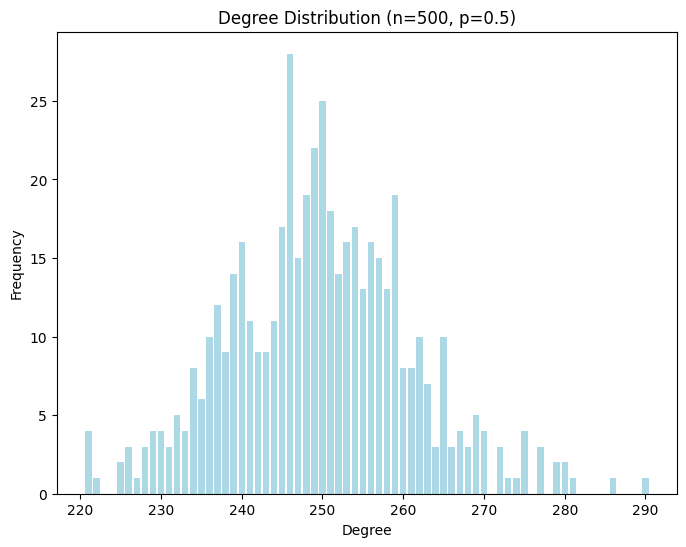

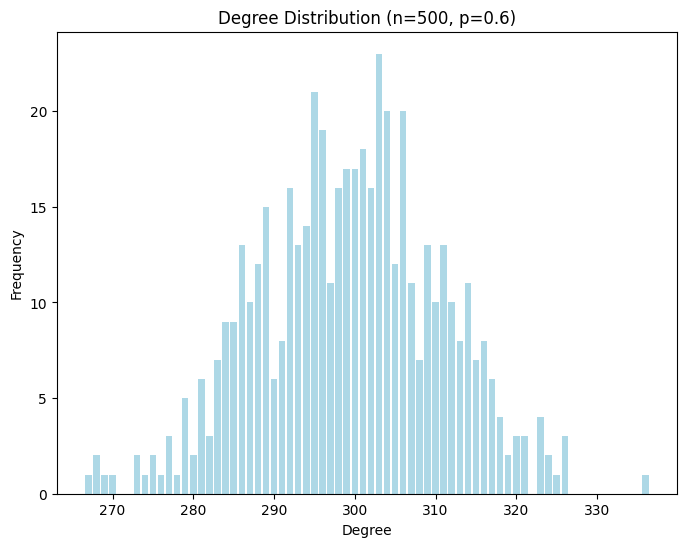

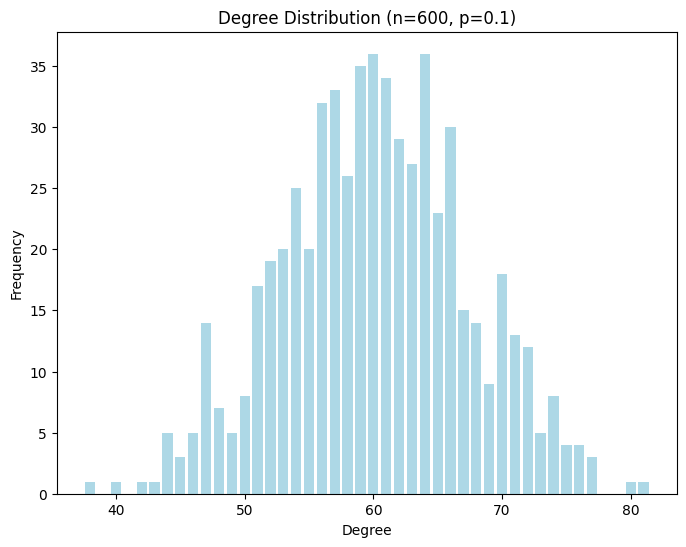

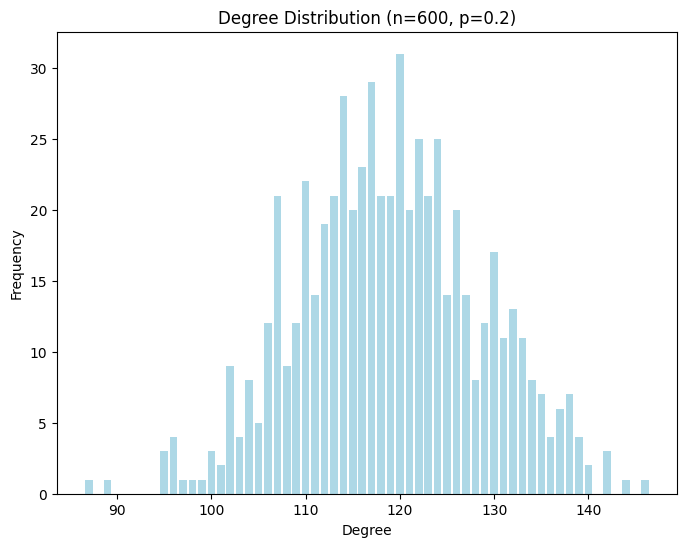

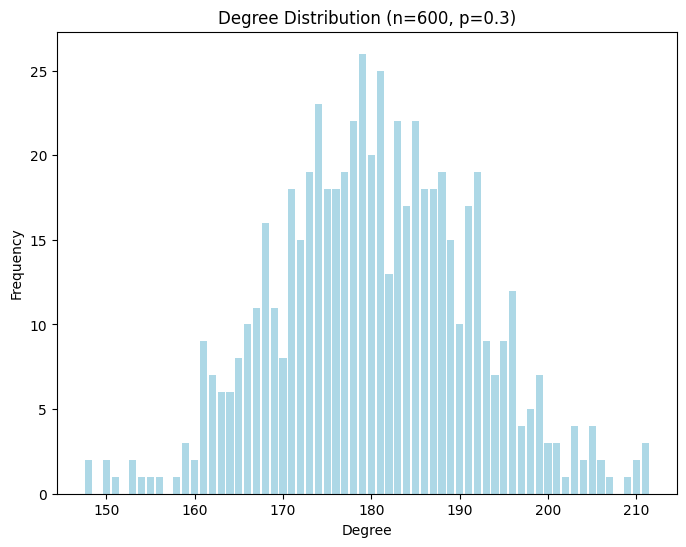

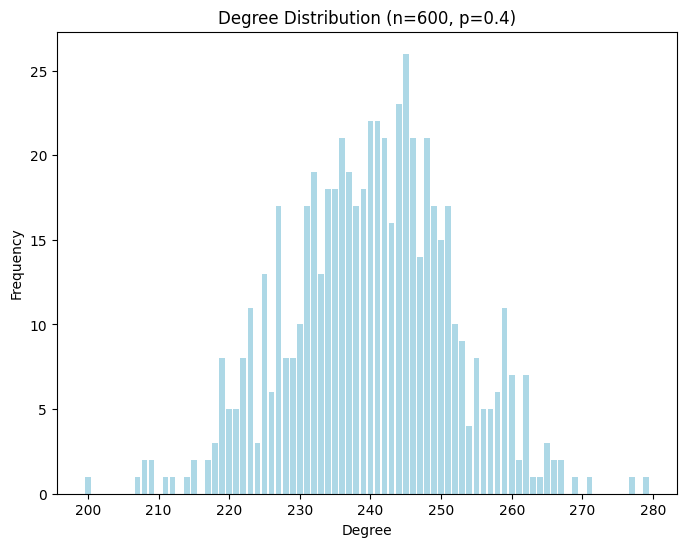

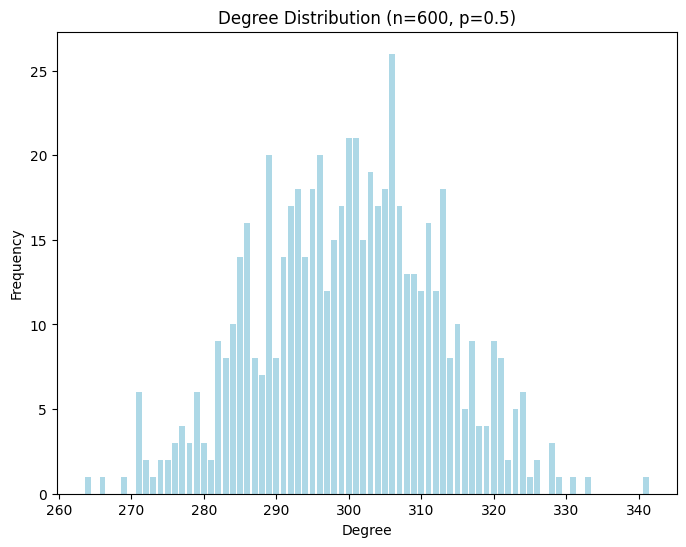

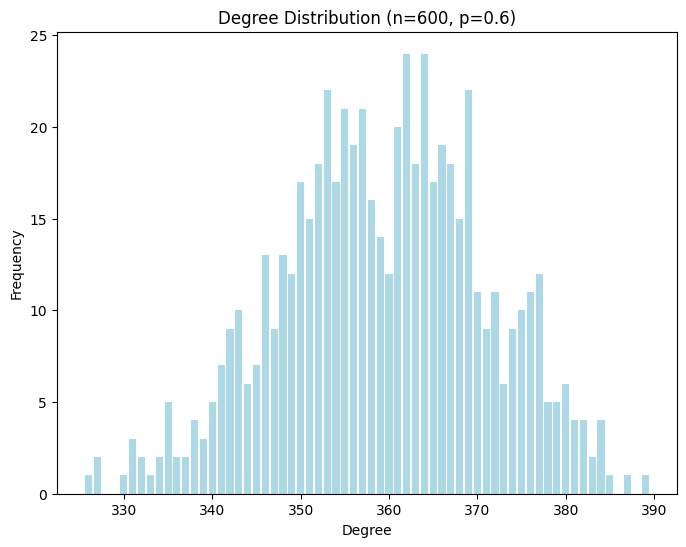

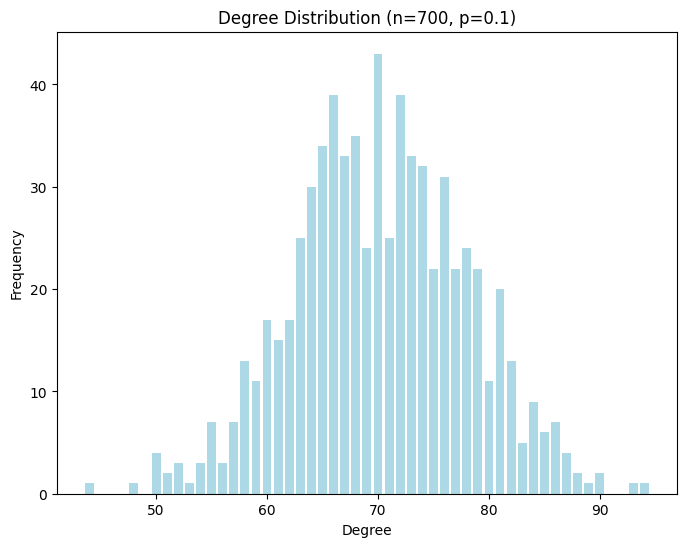

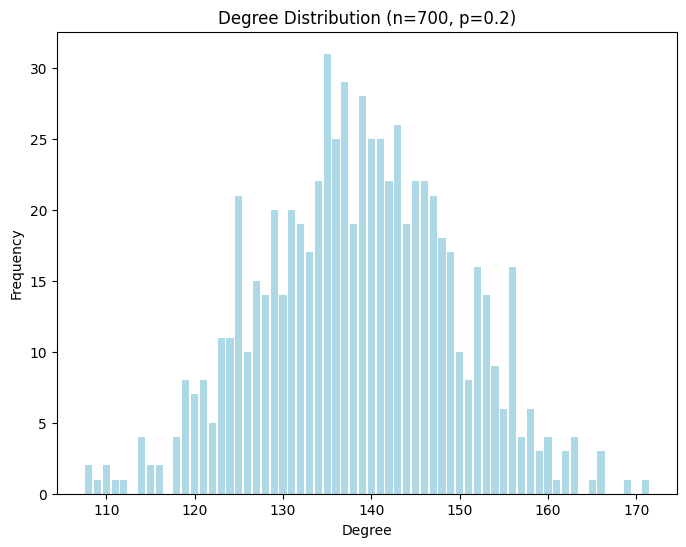

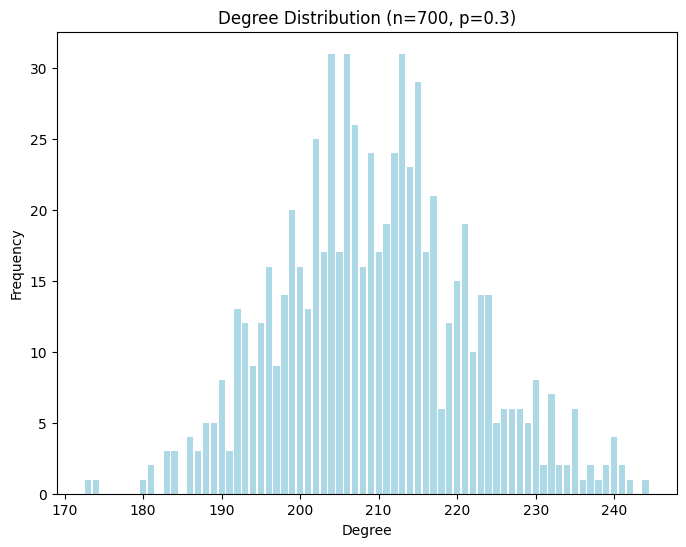

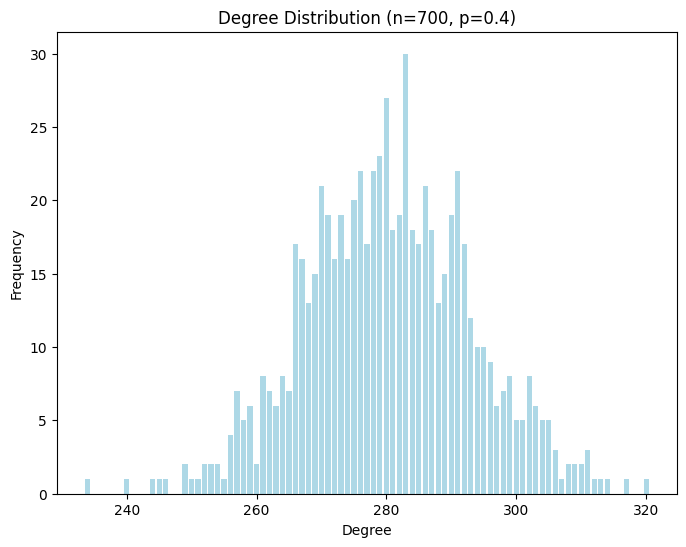

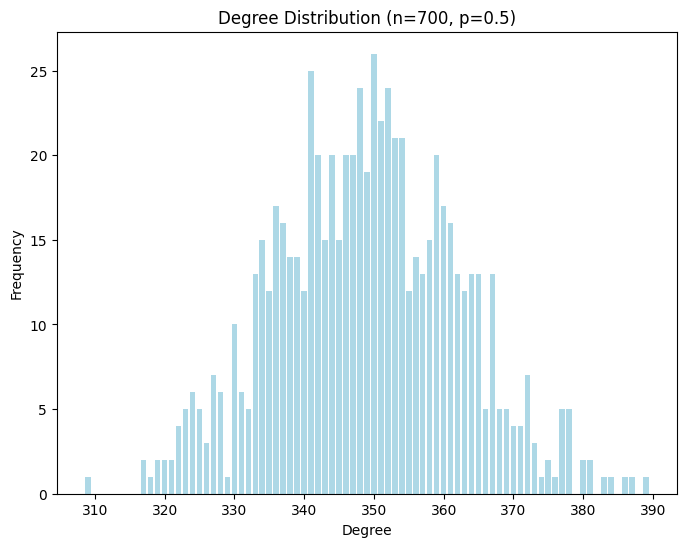

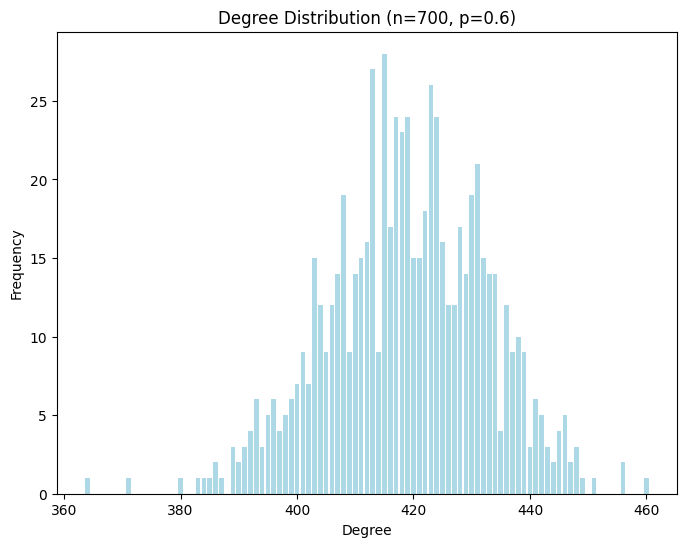

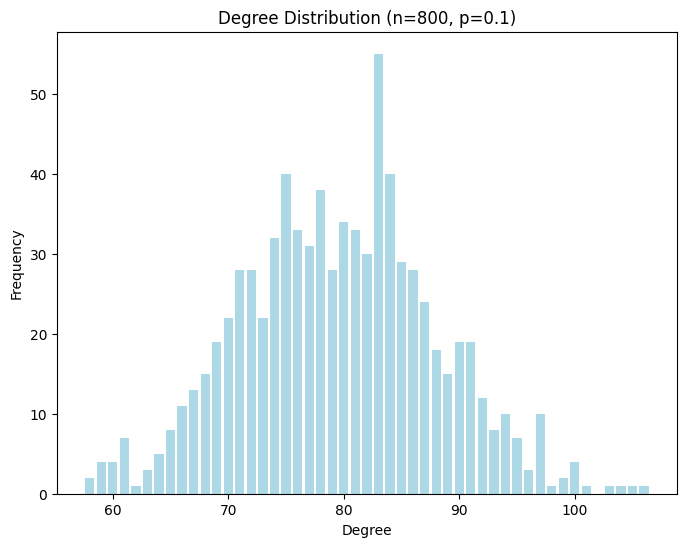

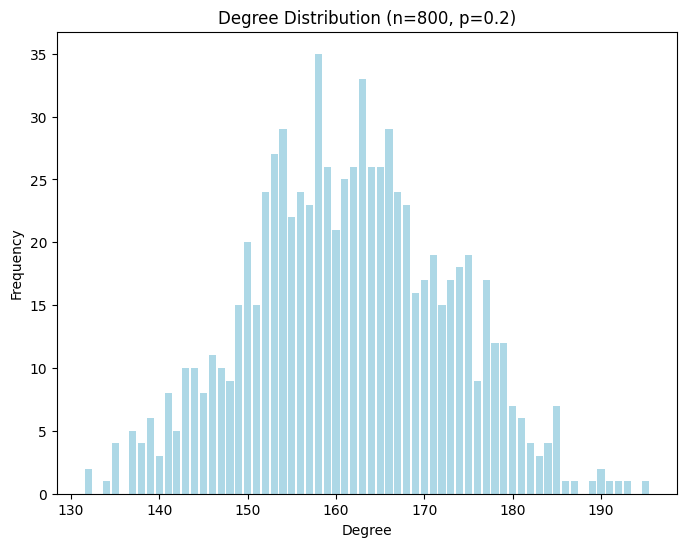

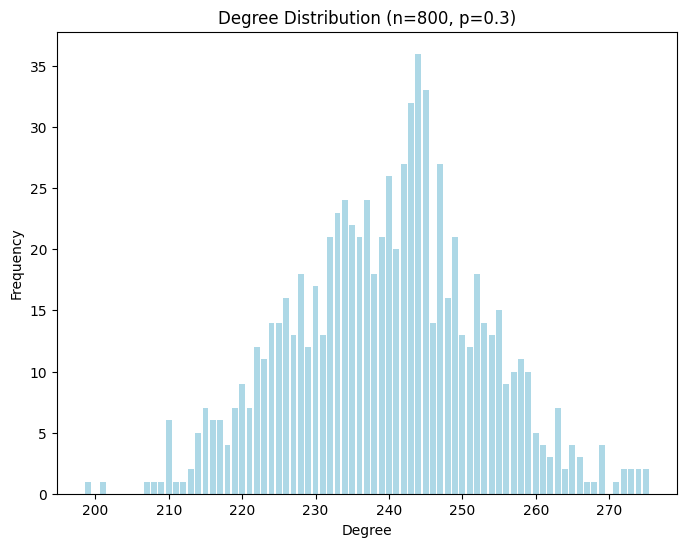

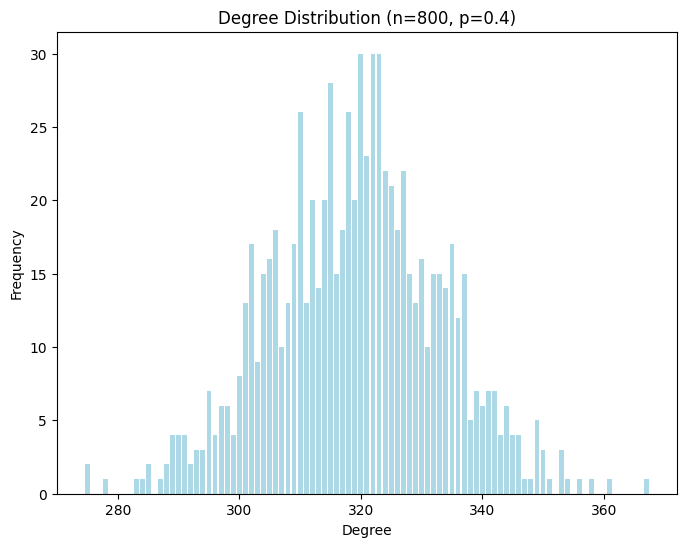

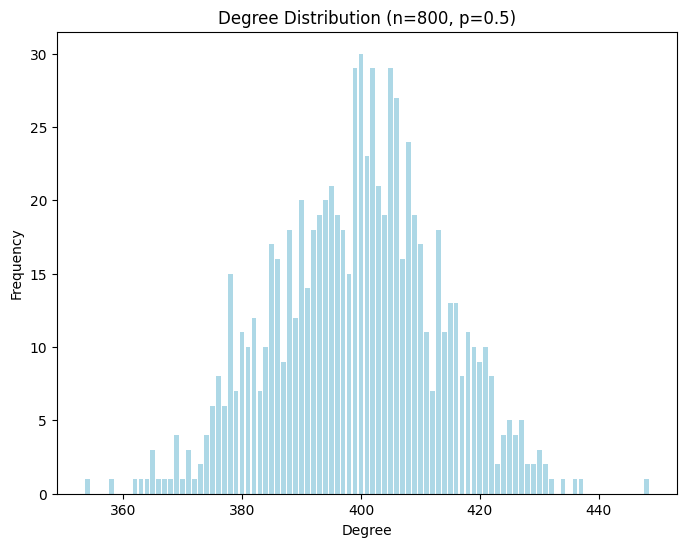

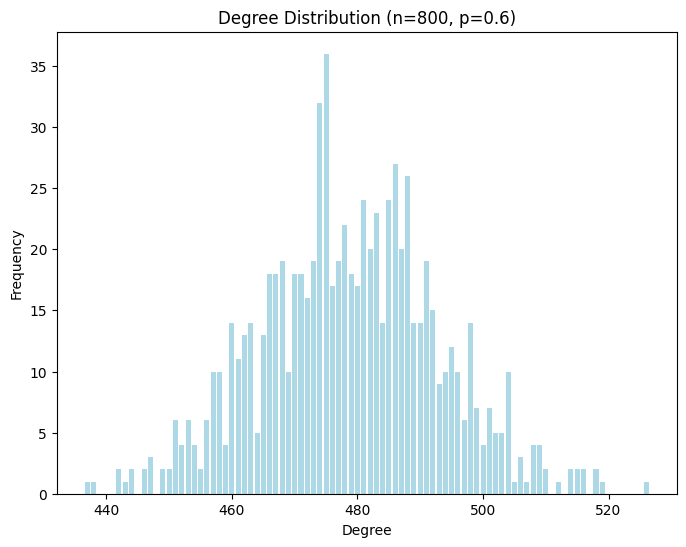

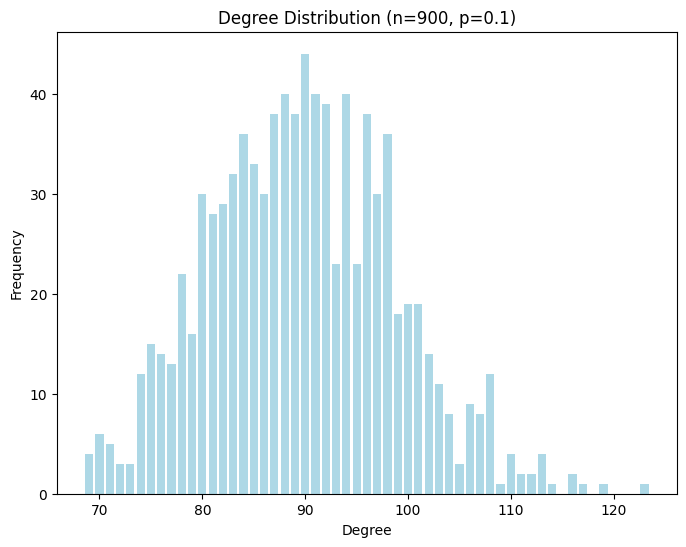

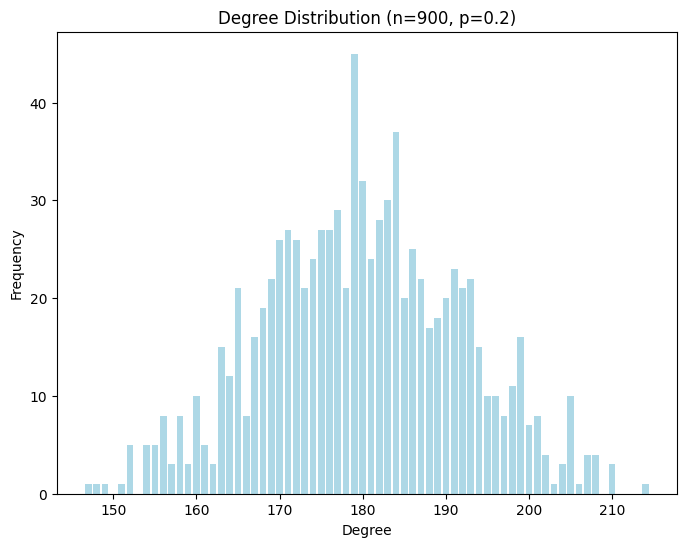

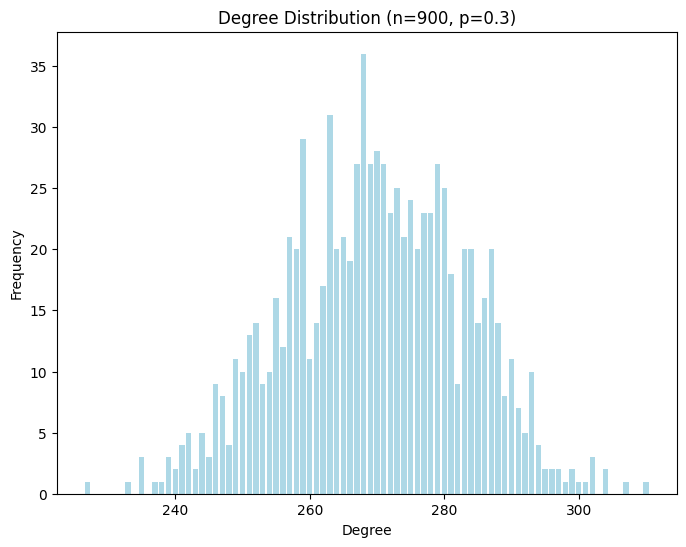

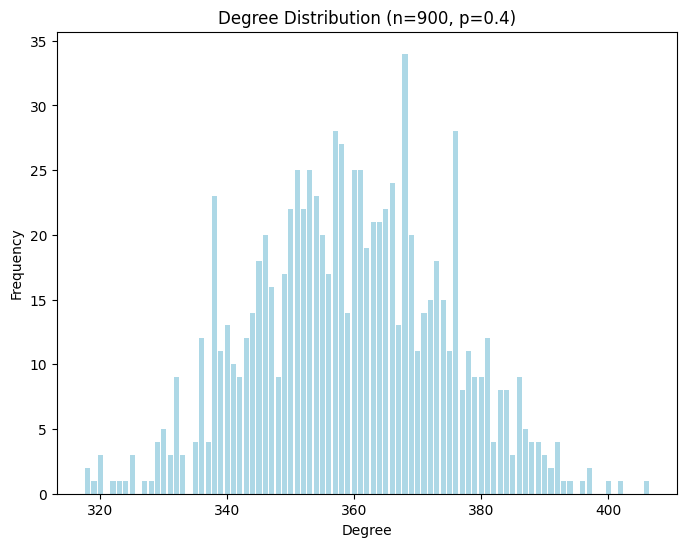

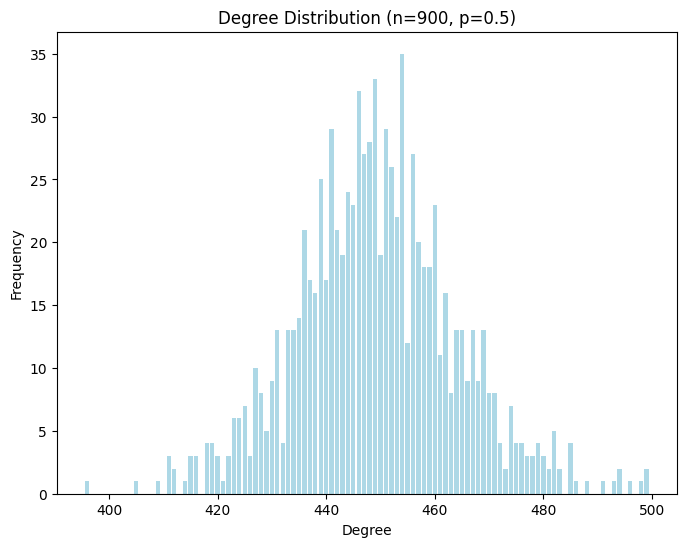

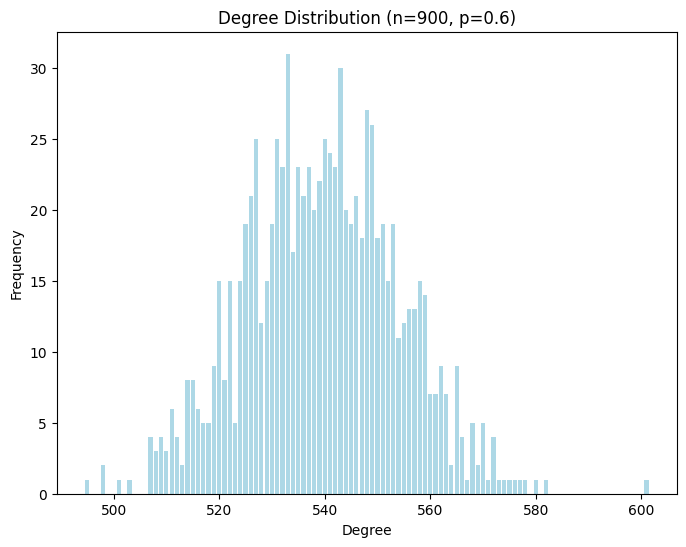

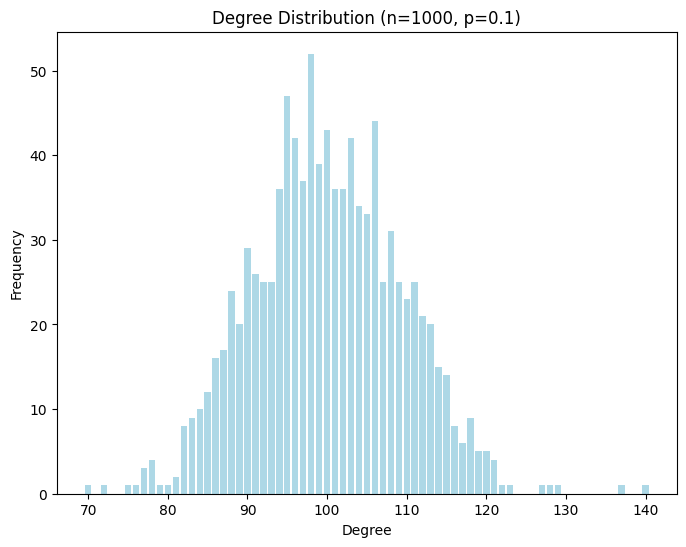

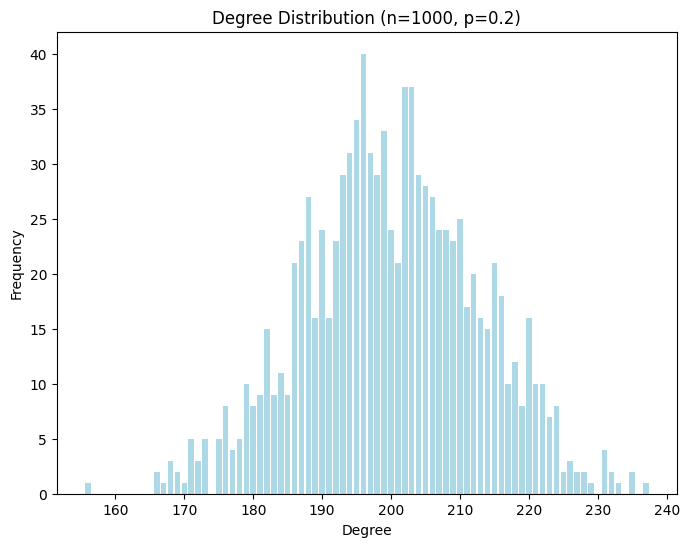

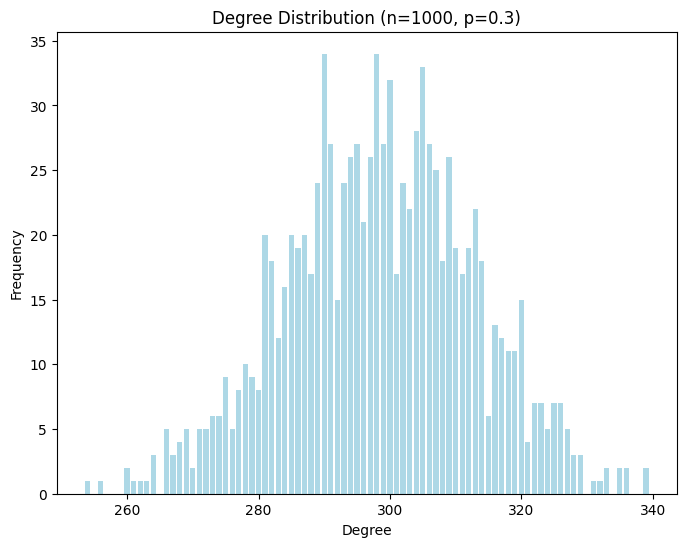

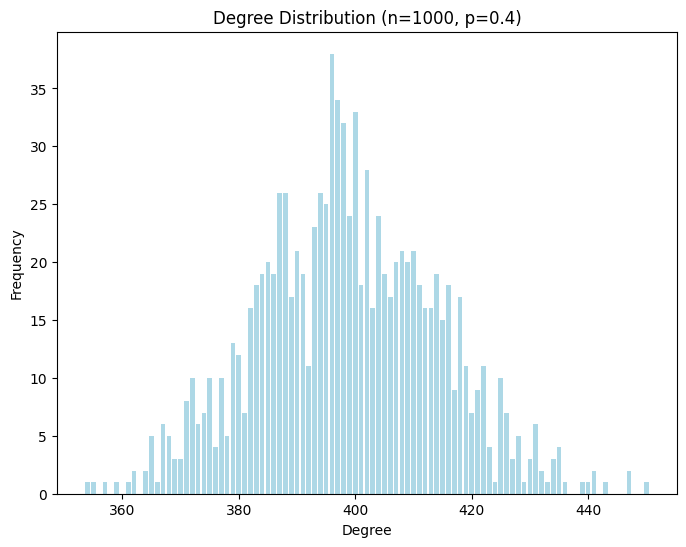

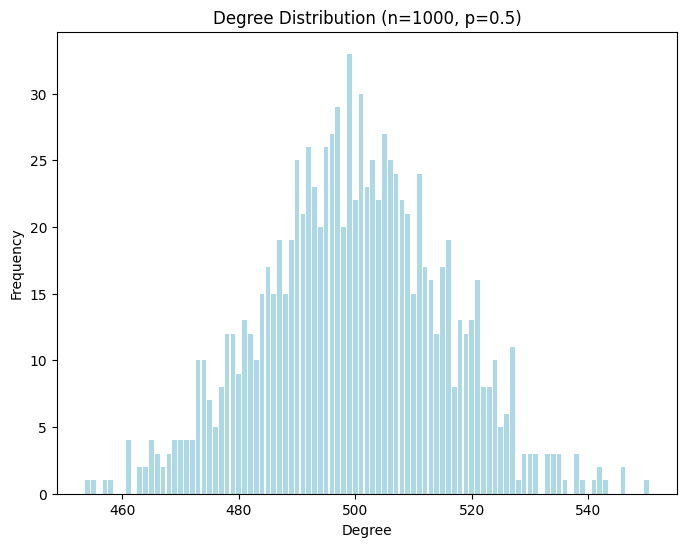

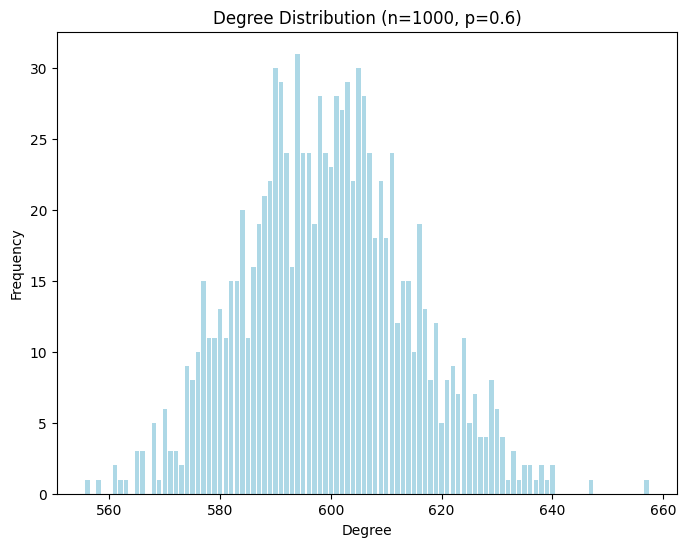

In [ ]:
# Generate graphs and plot degree distributions
for n in node_counts:
    for p in probabilities:
        graph = generate_er_random_graph(n, p)
        degree_distribution = calculate_degree_distribution(graph)
        plot_degree_distribution(degree_distribution, n, p)

Ques No - 2

In [ ]:
!pip install torch-geometric networkx pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.9 MB/s eta 0:00:00


CALCULATIONS OF VARIOUS CENTRALITY METRICS

In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd
import networkx as nx


In [ ]:
# Download the files using wget
!wget -O usa-airports.edgelist https://raw.githubusercontent.com/leoribeiro/struc2vec/master/graph/usa-airports.edgelist
!wget -O labels-usa-airports.txt https://raw.githubusercontent.com/leoribeiro/struc2vec/master/graph/labels-usa-airports.txt

--2024-08-22 14:08:58--  https://raw.githubusercontent.com/leoribeiro/struc2vec/master/graph/usa-airports.edgelist
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 163188 (159K) [text/plain]
Saving to: ‘usa-airports.edgelist’

usa-airports.edgeli 100%[===================>] 159.36K  --.-KB/s    in 0.1s    

2024-08-22 14:08:58 (1.45 MB/s) - ‘usa-airports.edgelist’ saved [163188/163188]

--2024-08-22 14:08:58--  https://raw.githubusercontent.com/leoribeiro/struc2vec/master/graph/labels-usa-airports.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
# Load the Graph
def load_graph():
    edges = pd.read_csv("/content/usa-airports.edgelist", sep=" ", header=None)


    # Convert the edgelist to a NetworkX graph
    G = nx.from_pandas_edgelist(edges, source=0, target=1)

    return G

In [ ]:
# Load Labels (Only Numeric Values)
def load_labels():
    with open("/content/labels-usa-airports.txt", "r") as file:
        data = file.readlines()

    # Parse the numeric values directly
    nodes, labels = [], []
    for line in data[1:]:
        node, label = map(int, line.split())
        nodes.append(node)
        labels.append(label)

    return pd.DataFrame({'node': nodes, 'label': labels})

In [ ]:
# Prepare One-hot Labels
def prepare_onehot(labels, G):
    nodes = list(G.nodes)

    # Filter out labels for nodes not present in the graph
    labels_filtered = labels[labels['node'].isin(nodes)]

    # Sort labels to match the order of nodes in the graph
    labels_sorted = labels_filtered.set_index('node').reindex(nodes).reset_index()

    # Convert the labels to a tensor
    labels_tensor = torch.tensor(labels_sorted['label'].values, dtype=torch.long)

    # One-hot encode the labels
    one_hot_y = F.one_hot(labels_tensor, num_classes=labels['label'].nunique()).float()

    return one_hot_y

In [ ]:
import numpy as np

In [ ]:
def compute_features(G):
    # Compute Degree Centrality
    degree_centrality = nx.degree_centrality(G)

    # Compute Eigenvector Centrality
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

    # Compute Betweenness Centrality
    betweenness_centrality = nx.betweenness_centrality(G)

    # Compute Local Clustering Coefficient
    clustering_coefficient = nx.clustering(G)

    # Compute Closeness Centrality
    closeness_centrality = nx.closeness_centrality(G)

    # Compute PageRank
    pagerank = nx.pagerank(G)

    # Compute Katz Centrality
    katz_centrality = nx.katz_centrality_numpy(G, alpha=0.01, beta=1.0)

    # Combine all the features into a DataFrame
    node_features = pd.DataFrame({
        'node': list(G.nodes),
        'degree_centrality': [degree_centrality[node] for node in G.nodes],
        'eigenvector_centrality': [eigenvector_centrality[node] for node in G.nodes],
        'betweenness_centrality': [betweenness_centrality[node] for node in G.nodes],
        'clustering_coefficient': [clustering_coefficient[node] for node in G.nodes],
        'closeness_centrality': [closeness_centrality[node] for node in G.nodes],
        'pagerank': [pagerank[node] for node in G.nodes],
        'katz_centrality': [katz_centrality[node] for node in G.nodes]
    })

    return node_features

In [ ]:
G = load_graph()  # Load the graph
labels = load_labels()  # Load the labels
one_hot_y = prepare_onehot(labels, G)  # Prepare one-hot labels
new_features = compute_features(G)  # Compute new node features


In [ ]:
print("One-hot labels:\n", one_hot_y)
print("\nNode features:\n", new_features.head())

One-hot labels:
 tensor([[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

Node features:
     node  degree_centrality  eigenvector_centrality  betweenness_centrality  \
0  12343           0.002523                0.001863                0.000000   
1  12129           0.005046                0.003724                0.000010   
2  13277           0.022708                0.017436                0.000089   
3  11996           0.112700                0.092368                0.002647   
4  13796           0.137090                0.098950                0.022361   

   clustering_coefficient  closeness_centrality  pagerank  katz_centrality  
0                1.000000              0.335897  0.000215         0.001051  
1                0.533333              0.342521  0.000301         0.002931  
2                0.529915              0.361941  0.000751         0.016816  
3            

**PART: 3**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.utils.data as data

In [ ]:
# Combine the features and labels into a single DataFrame
combined_data = new_features.copy()
combined_data['label'] = labels.set_index('node').reindex(new_features['node']).reset_index(drop=True)['label']

In [ ]:
# Separate features and labels
X = combined_data.drop(columns=['node', 'label']).values
y = combined_data['label'].values

In [ ]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Create DataLoader for batching
train_dataset = data.TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = data.TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = data.TensorDataset(X_test_tensor, y_test_tensor)

In [ ]:
train_loader = data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = data.DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data

# Define the neural network architecture
class MultiClassNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, num_classes):
        super(MultiClassNN, self).__init__()

        # Create a list of layers
        layers = []

        # Input layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.ReLU())

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.ReLU())

        # Output layer
        layers.append(nn.Linear(hidden_sizes[-1], num_classes))

        # Combine all layers into a Sequential container
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

In [ ]:
# Example usage:
input_size = 7  # Example input size
hidden_sizes = [64,32,16,8]   # Example list of hidden sizes
num_classes = 4  # Example number of output classes
# Loss and optimizer

model = MultiClassNN(input_size, hidden_sizes, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.002)
print(model)

MultiClassNN(
  (model): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=8, bias=True)
    (7): ReLU()
    (8): Linear(in_features=8, out_features=4, bias=True)
  )
)


In [ ]:
# Training loop
num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        output = model(data)  # Forward pass
        loss = criterion(output, target)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize

    # Validation step
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            val_loss += criterion(output, target).item()  # Sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    val_loss /= len(val_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss:.4f}, Accuracy: {100. * correct / len(val_loader.dataset):.2f}%')

Epoch 1/250, Validation Loss: 0.0232, Accuracy: 26.47%
Epoch 2/250, Validation Loss: 0.0225, Accuracy: 41.18%
Epoch 3/250, Validation Loss: 0.0207, Accuracy: 39.92%
Epoch 4/250, Validation Loss: 0.0195, Accuracy: 45.38%
Epoch 5/250, Validation Loss: 0.0190, Accuracy: 44.96%
Epoch 6/250, Validation Loss: 0.0183, Accuracy: 51.68%
Epoch 7/250, Validation Loss: 0.0177, Accuracy: 55.04%
Epoch 8/250, Validation Loss: 0.0176, Accuracy: 55.46%
Epoch 9/250, Validation Loss: 0.0174, Accuracy: 55.46%
Epoch 10/250, Validation Loss: 0.0173, Accuracy: 57.14%
Epoch 11/250, Validation Loss: 0.0172, Accuracy: 57.14%
Epoch 12/250, Validation Loss: 0.0172, Accuracy: 57.98%
Epoch 13/250, Validation Loss: 0.0172, Accuracy: 58.82%
Epoch 14/250, Validation Loss: 0.0171, Accuracy: 58.40%
Epoch 15/250, Validation Loss: 0.0171, Accuracy: 60.92%
Epoch 16/250, Validation Loss: 0.0172, Accuracy: 57.98%
Epoch 17/250, Validation Loss: 0.0173, Accuracy: 60.92%
Epoch 18/250, Validation Loss: 0.0170, Accuracy: 60.50%
E

In [ ]:
# Testing step
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        test_loss += criterion(output, target).item()  # Sum up batch loss
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {100. * correct / len(test_loader.dataset):.2f}%')

Test Loss: 0.0163, Test Accuracy: 64.71%


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

def evaluate_model(loader, dataset_name):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            pred = output.argmax(dim=1, keepdim=False)  # Predicted class
            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(target.cpu().numpy())

    # Calculate metrics
    accuracy = accuracy_score(all_labels, all_preds)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='macro')
    print(f"{dataset_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


In [ ]:
evaluate_model(test_loader, "Test Set")


Test Set - Accuracy: 0.6471, Precision: 0.6414, Recall: 0.6468, F1-Score: 0.6378


In [ ]:
evaluate_model(train_loader, "Train Set")


Train Set - Accuracy: 0.7423, Precision: 0.7346, Recall: 0.7419, F1-Score: 0.7341


In [ ]:
evaluate_model(val_loader, "Validation Set")


Validation Set - Accuracy: 0.6513, Precision: 0.6477, Recall: 0.6515, F1-Score: 0.6406


In [ ]:
def plot_classification_results(G, y_true, y_pred):
    plt.figure(figsize=(16, 10))
    pos = nx.spring_layout(G)

    # Draw nodes with true labels
    nx.draw_networkx_nodes(G, pos, node_color=y_true, cmap=plt.get_cmap('viridis'), node_size=50, alpha=0.6)

    # Draw nodes with predicted labels (overlay)
    nx.draw_networkx_nodes(G, pos, node_color=y_pred, cmap=plt.get_cmap('coolwarm'), node_size=20, alpha=0.9, edgecolors='black')

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    plt.title("Graph Visualization with True (larger) and Predicted (smaller) Labels")
    plt.show()

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32)

# Get predictions for the entire dataset
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor).argmax(dim=1).cpu().numpy()

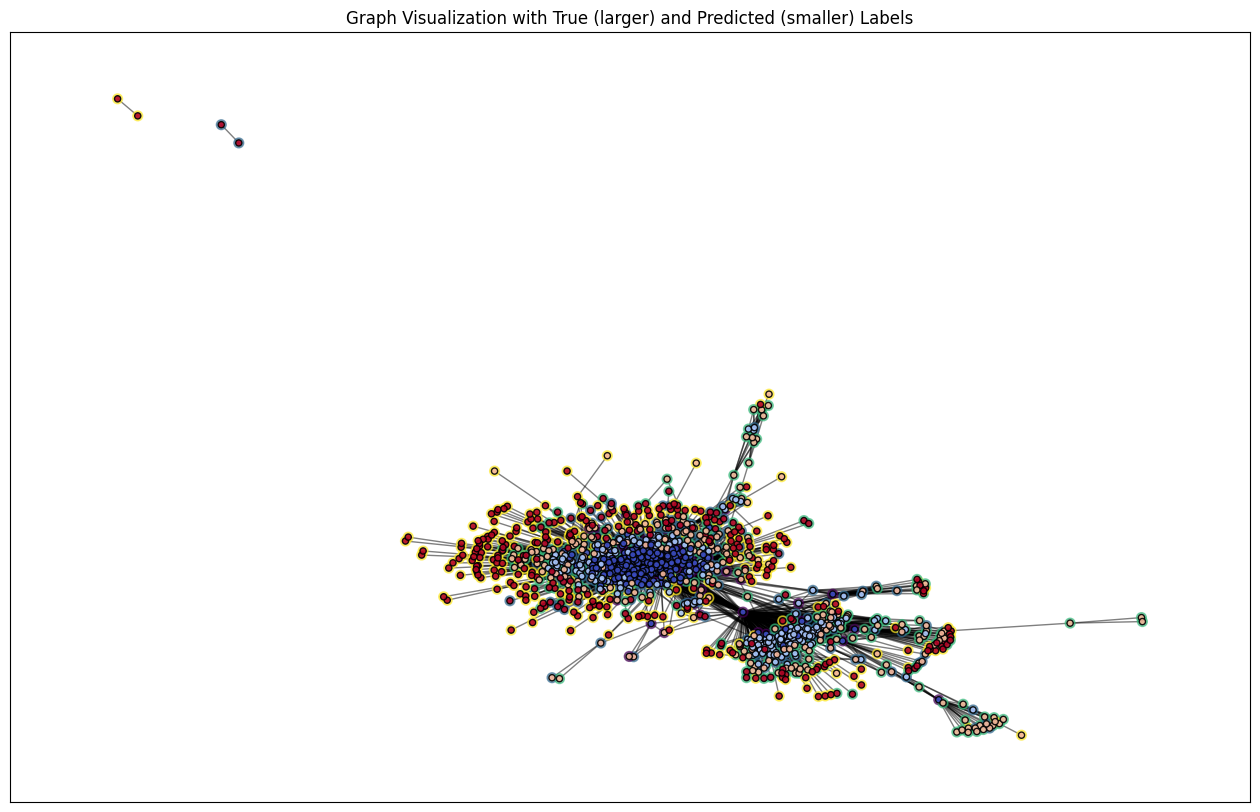

In [ ]:
# Plot the classification results
plot_classification_results(G, y, y_pred)


In [ ]:
def plot_classification_results(G, y_true, y_pred):
    pos = nx.spring_layout(G)  # Compute node positions

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(16, 10))

    # Plot for true labels
    nx.draw_networkx_nodes(G, pos, node_color=y_true, cmap=plt.get_cmap('viridis'), node_size=50, alpha=0.8, ax=ax[0])
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax[0])
    ax[0].set_title("True Labels")
    ax[0].set_axis_off()

    # Plot for predicted labels
    nx.draw_networkx_nodes(G, pos, node_color=y_pred, cmap=plt.get_cmap('coolwarm'), node_size=50, alpha=0.8, edgecolors='black', ax=ax[1])
    nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax[1])
    ax[1].set_title("Predicted Labels")
    ax[1].set_axis_off()

    plt.show()



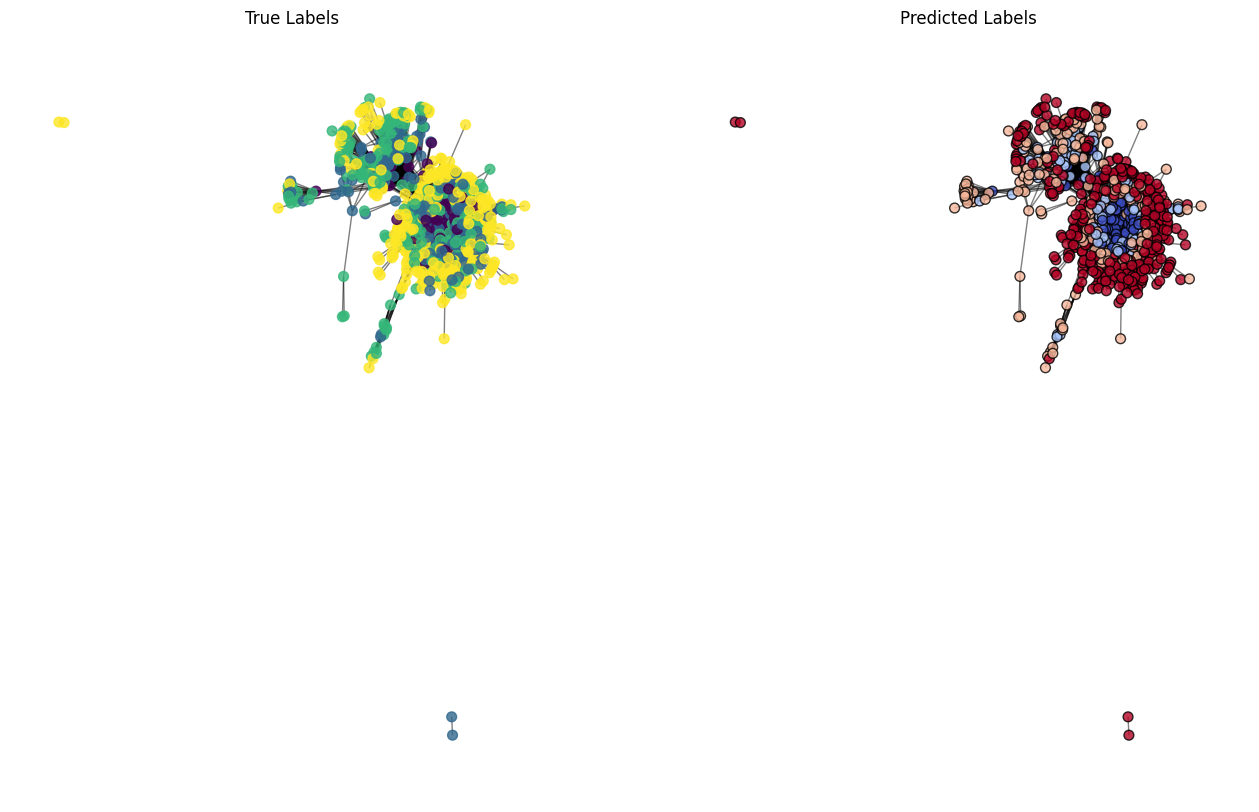

In [ ]:
# Example Usage
plot_classification_results(G, y, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))

    # Create a heatmap using seaborn
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

    plt.title('Confusion Matrix (Normalized)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

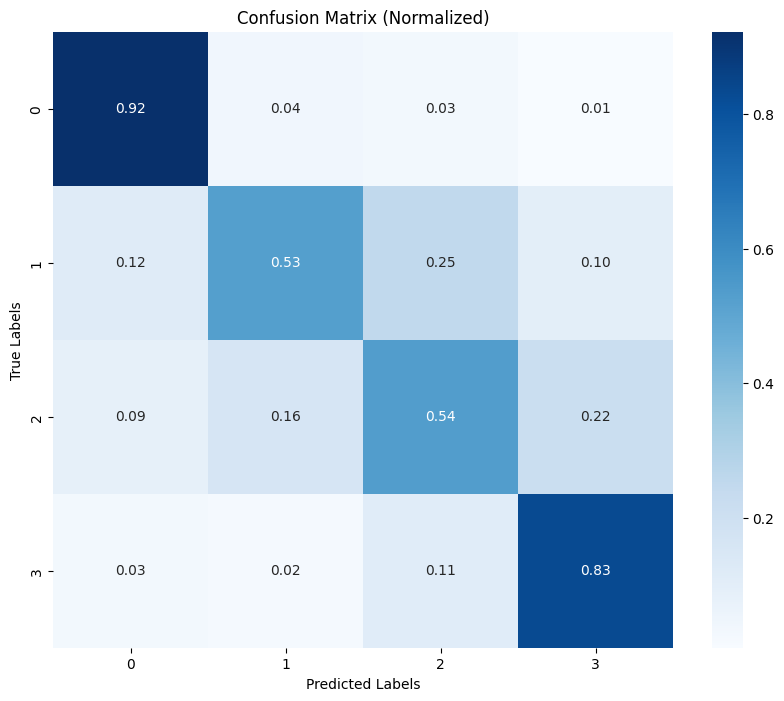

In [ ]:
class_names = [str(i) for i in np.unique(y)]
plot_confusion_matrix(y, y_pred, class_names)